## Praca domowa 4

#### Autor: Julia Przybytniowska

### Zadanie 1 (1.5 pkt)


Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
# a)
df[(df["Year"] > 2015) & (df["Publisher"] == "Nintendo") & (df["NA_Sales"] < df["EU_Sales"])].reset_index(drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [4]:
# b)
sum = df.groupby(["Genre"]).sum()
sum["Global_Sales"].idxmax()

'Action'

In [15]:
# c)
mean = df.rename(columns = {"Genre" : "Typ Gry"}).groupby(["Typ Gry"]).mean()
mean = mean[mean["JP_Sales"] > mean["EU_Sales"]].sort_values(by = ["JP_Sales"])
mean.loc[:, ["JP_Sales"]].rename(columns = { 'JP_Sales': 'Średnia sprzedaż w Japonii'}, inplace = False)

,Średnia sprzedaż w Japonii
Typ Gry,
Strategy,0.073284
Puzzle,0.099439
Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

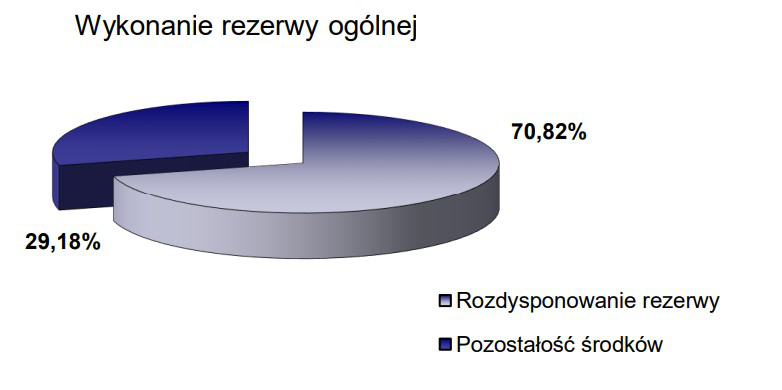

In [7]:
# 1) 
# https://www.gov.pl/web/finanse/wykresy-za-2021-r 
#       -> plik o nazwie "Rezerwa ogólna i rezerwy celowe - stan na 30 wrezśnia 2021 r."
from PIL import Image
image = Image.open("wykresDoPoprawy.jpg");
image

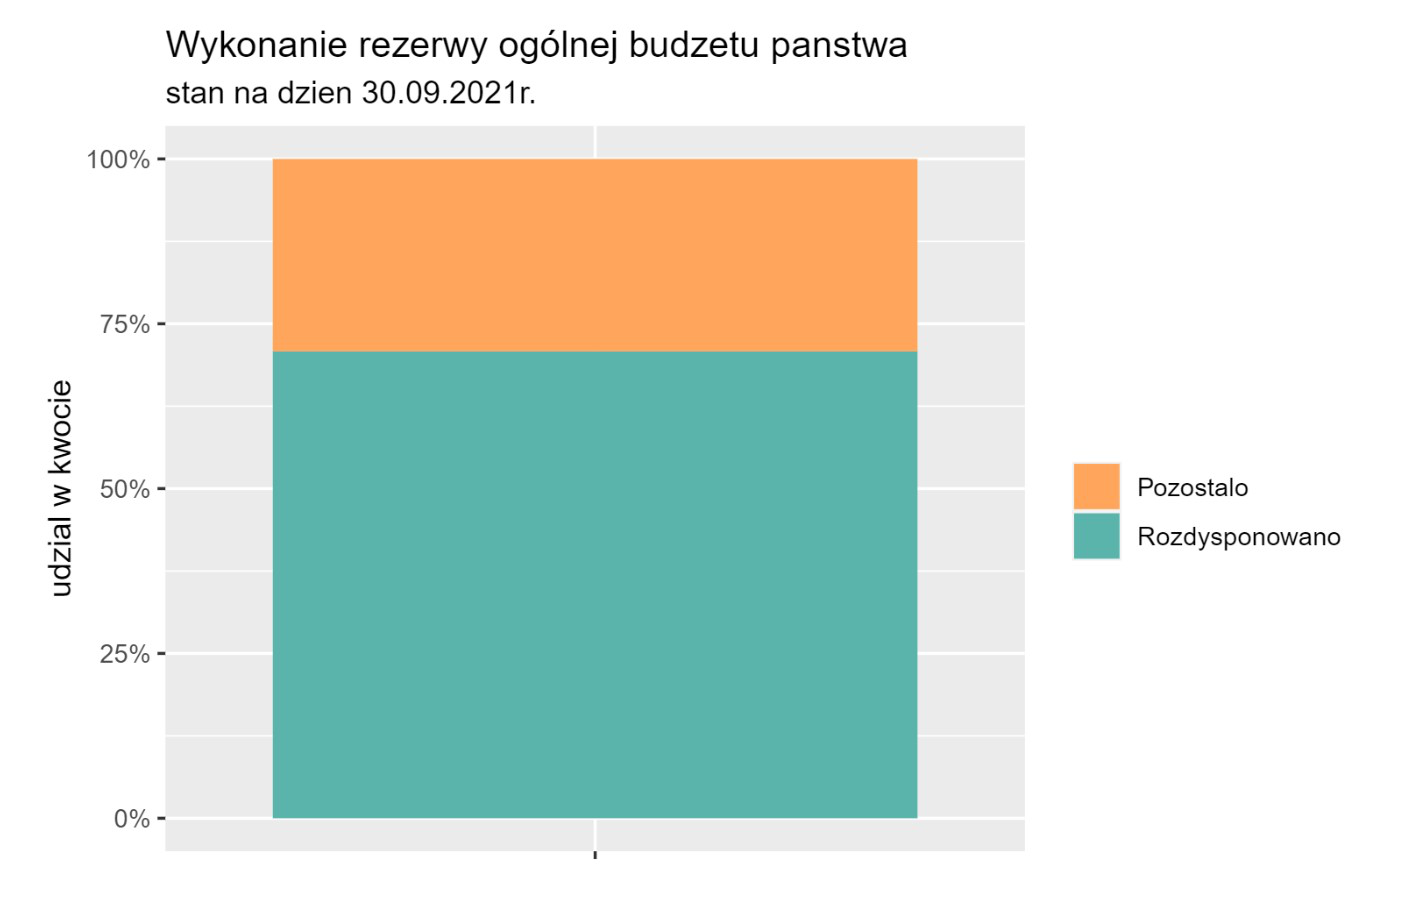

In [8]:
# 2)
# https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/Kopyt_Agata/Kopyt_Agata_hw2.pdf
Image.open("wykresDoPoprawy2.jpg")

In [9]:
sns.set_style("ticks")

In [10]:
a = np.array(["Rozdysponowanie środków", "Pozostałość środków"])
b = np.array([0.7082, 0.2918])

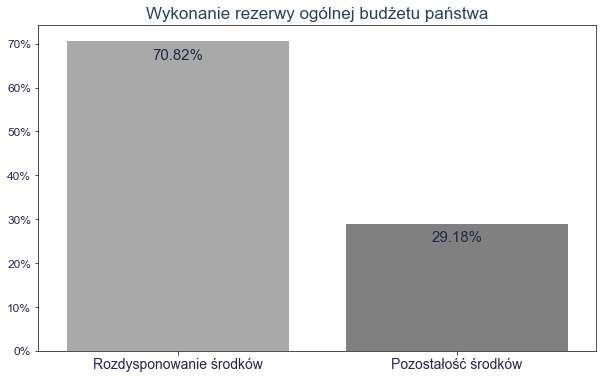

In [11]:
fig = plt.figure(figsize=(10, 6))
plot = sns.barplot(x=a,y=b, palette = ("darkgrey", "grey"))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
i = 0
for p in plot.patches:
    if i == 0:
        s = "70.82%"
    else:
        s = str(p.get_height()*100) + "%"
    plot.annotate(s, 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -15),
                   size = 15,
                   textcoords = 'offset points', 
                 color = "#202A44")
    i = 1
    
plt.xticks(fontsize = 14, color = "#2E2252")  
plt.yticks(fontsize = 12, color = "#2E2252")
plt.title("Wykonanie rezerwy ogólnej budżetu państwa", fontsize = 17, color = "#27445C")
plt.show()

##### 4) Uzasadnienie

Uważam, że wykres stworzony w języku Python jest lepszy od pierwszego, ponieważ jest wykresem słupkowym w przestrzeni 2D, przez co porównanie wartości jest łatwiejsze dla odbiorców. Drugą ważną według mnie poprawą jest zlikwidowanie gradientu kolorystycznego na cześci kola odpowiadającej "Rozdysponowanie środków" - który może mylnie sygnalizować cześć wspolną. \
Wykres stworzony przeze mnie nie różni się tak bardzo z wykresem poprawionym w HW2, jak te opisane powyżej. Moim zdaniem, wartości dwóch zmiennych sa lepiej przedstawione i łatwiejsze do odczytania z wykresu. Dodatkowo zmieniłam na stonowane kolory (które mniej "męczą" oczy przy dluższym patrzeniu) oraz zniwelowałam przestrzeń poniżej wartości 0% (dzieki czemu słupki zaczynają sie od samego dołu wykresu a nie "latają").